# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 3. Tập dữ liệu Iris (trong sklearn.datasets.load_iris) chứa 3 lớp, trong đó mỗi lớp có 50 quan trắc về các bông hoa diên vĩ.
- a. Dùng PCA để giảm chiều dữ liệu.
- b. Trực quan hoá dữ liệu đã giảm chiều với màu là loài hoa. Nhận xét.

In [53]:
# Import libraries and datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [54]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [55]:
# Transpose X
X = X.T

# Mean X
X_bar = np.mean(X, axis=1)

In [56]:
# Centered around its mean
X_hat = X - np.expand_dims(X_bar, axis=1)
print(X_hat[:,:5])


[[-0.74333333 -0.94333333 -1.14333333 -1.24333333 -0.84333333]
 [ 0.44266667 -0.05733333  0.14266667  0.04266667  0.54266667]
 [-2.358      -2.358      -2.458      -2.258      -2.358     ]
 [-0.99933333 -0.99933333 -0.99933333 -0.99933333 -0.99933333]]


In [57]:
# Cov Matrix
S = np.cov(X_hat)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(S)

print(eigenvalues)
print(eigenvectors)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [58]:
# The cumulative explained variance ratio for each principal component in PCA.
np.cumsum(eigenvalues) / np.sum(eigenvalues)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

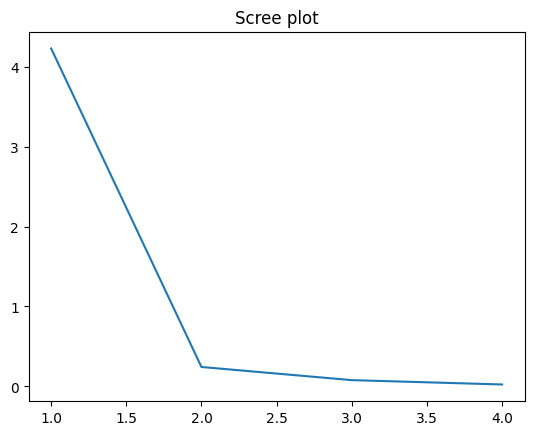

In [59]:
# Scree Plot
plt.plot(range(1,5),eigenvalues)
plt.title("Scree plot")
plt.show()

In [60]:
# Selects the first two principal components from the eigenvectors matrix obtained from PCA.
B = eigenvectors[:,:2]

X_pca = X_hat.T.dot(B)
print(X_pca[:5])

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]]


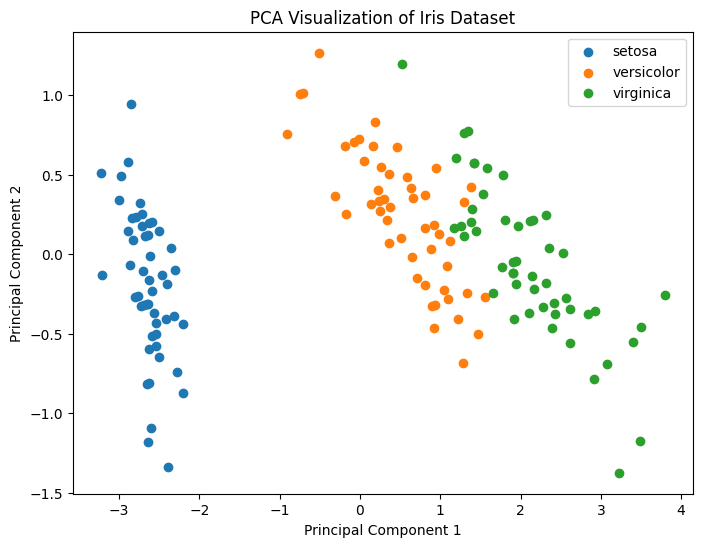

In [61]:
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i])

plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Based on the histogram, we can see that the Iris flower classes are relatively well separated in the new space with dimensionality reduced to 2. This shows that PCA effectively reduced the dimensionality of the data, retaining Much of the taxonomic information is between flower classes.

## Bài 4. Tập tin turtle chứa dữ liệu về kích thước mai và giới tính của 48 cá thể rùa Chrysemys picta.
- a. Dùng PCA để giảm chiều dữ liệu.
- b. Trực quan hoá dữ liệu đã giảm chiều với màu là loài hoa. Nhận xét.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# URL link containing the data
url = "http://users.stat.umn.edu/~sandy/courses/8053/Data/Wichern_data/T6-9.dat"

# Read data from the URL and store it in a DataFrame
df = pd.read_table(url, sep="\s+", header=None)

# Convert DataFrame to numpy ndarray
data = df.values

# Display some initial rows of the data
print(data[:5])

[[98 81 38 'female']
 [103 84 38 'female']
 [103 86 42 'female']
 [105 86 42 'female']
 [109 88 44 'female']]


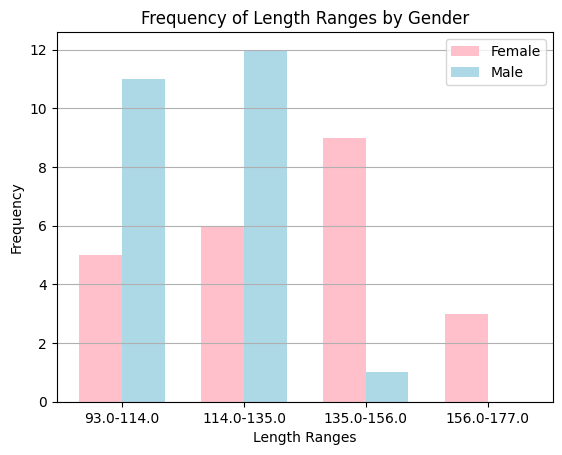

In [63]:
# Extracting length and gender data
lengths = data[:, 0].astype(float)
genders = data[:, 3]

# Define length ranges
length_ranges = np.linspace(np.min(lengths), np.max(lengths), 5)  # Define your own length ranges here

# Group data by gender and calculate frequency of length ranges
female_lengths = [np.sum((lengths >= length_ranges[i]) & (lengths < length_ranges[i+1]) & (genders == 'female')) 
                  for i in range(len(length_ranges)-1)]
male_lengths = [np.sum((lengths >= length_ranges[i]) & (lengths < length_ranges[i+1]) & (genders == 'male')) 
                for i in range(len(length_ranges)-1)]

# Plotting
bar_width = 0.35
index = np.arange(len(length_ranges)-1)
plt.bar(index, female_lengths, bar_width, label='Female', color='pink')
plt.bar(index + bar_width, male_lengths, bar_width, label='Male', color='lightblue')

plt.xlabel('Length Ranges')
plt.ylabel('Frequency')
plt.title('Frequency of Length Ranges by Gender')
plt.xticks(index + bar_width / 2, [f'{length_ranges[i]}-{length_ranges[i+1]}' for i in range(len(length_ranges)-1)])
plt.legend()
plt.grid(axis='y')

plt.show()

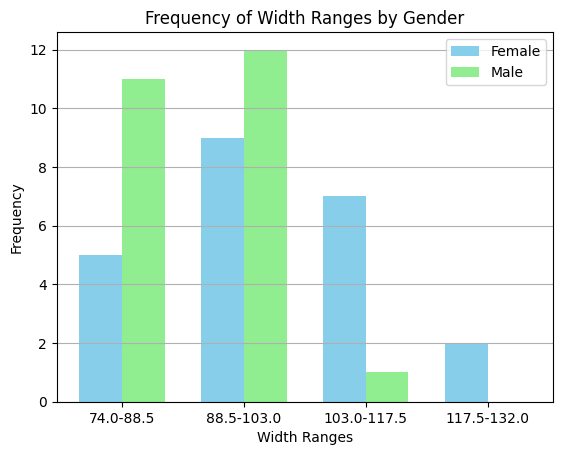

In [64]:
# Extracting weight and gender data
widths = data[:, 1].astype(float)
genders = data[:, 3]

# Define width ranges
width_ranges =  np.linspace(np.min(widths), np.max(widths), 5)  # Define your own width ranges here

# Group data by gender and calculate frequency of weight ranges
female_widths = [np.sum((widths >= width_ranges[i]) & (widths < width_ranges[i+1]) & (genders == 'female')) 
                  for i in range(len(width_ranges)-1)]
male_widths = [np.sum((widths >= width_ranges[i]) & (widths < width_ranges[i+1]) & (genders == 'male')) 
                for i in range(len(width_ranges)-1)]

# Plotting
bar_width = 0.35
index = np.arange(len(width_ranges)-1)
plt.bar(index, female_widths, bar_width, label='Female', color='skyblue')
plt.bar(index + bar_width, male_widths, bar_width, label='Male', color='lightgreen')

plt.xlabel('Width Ranges')
plt.ylabel('Frequency')
plt.title('Frequency of Width Ranges by Gender')
plt.xticks(index + bar_width / 2, [f'{width_ranges[i]}-{width_ranges[i+1]}' for i in range(len(width_ranges)-1)])
plt.legend()
plt.grid(axis='y')

plt.show()

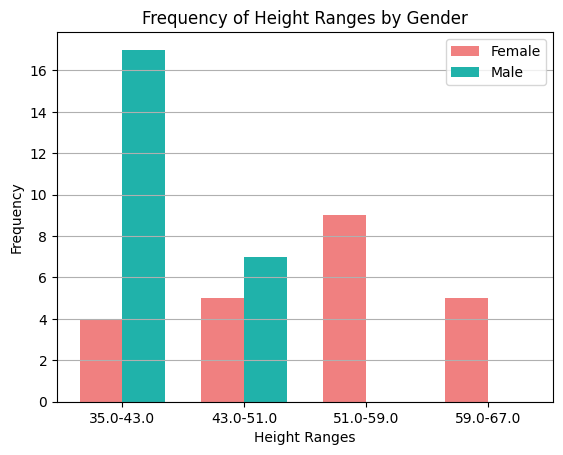

In [65]:
# Extracting length data
heights = data[:, 2].astype(float)

# Define height ranges
height_ranges = np.linspace(np.min(heights), np.max(heights), 5)  # Define your own height ranges here

# Group data by gender and calculate frequency of height ranges
female_heights = [np.sum((heights >= height_ranges[i]) & (heights < height_ranges[i+1]) & (genders == 'female')) 
                  for i in range(len(height_ranges)-1)]
male_heights = [np.sum((heights >= height_ranges[i]) & (heights < height_ranges[i+1]) & (genders == 'male')) 
                for i in range(len(height_ranges)-1)]

# Plotting
bar_width = 0.35
index = np.arange(len(height_ranges)-1)
plt.bar(index, female_heights, bar_width, label='Female', color='lightcoral')
plt.bar(index + bar_width, male_heights, bar_width, label='Male', color='lightseagreen')

plt.xlabel('Height Ranges')
plt.ylabel('Frequency')
plt.title('Frequency of Height Ranges by Gender')
plt.xticks(index + bar_width / 2, [f'{height_ranges[i]}-{height_ranges[i+1]}' for i in range(len(height_ranges)-1)])
plt.legend()
plt.grid(axis='y')

plt.show()

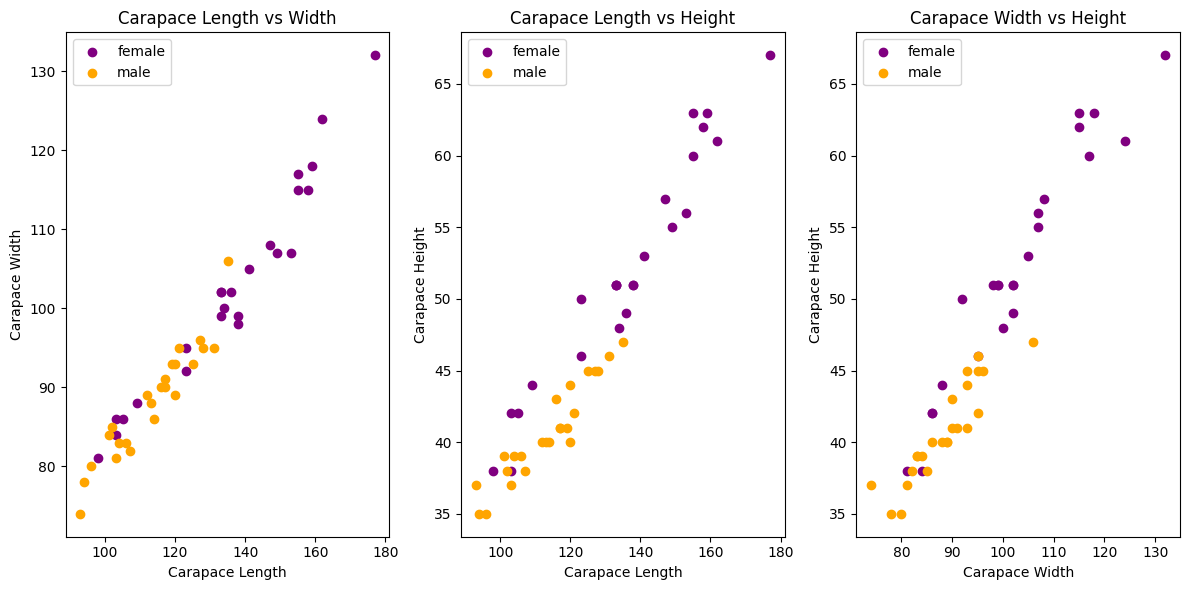

In [66]:
# Extracting data for plotting
carapace_lengths = data[:, 0].astype(float)
carapace_widths = data[:, 1].astype(float)
carapace_heights = data[:, 2].astype(float)
genders = data[:, 3]

# Mapping gender to colors
color_map = {'female': 'purple', 'male': 'orange'}  # You can add more colors for different genders if needed

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
for gender in np.unique(genders):
    ix = np.where(genders == gender)
    plt.scatter(carapace_lengths[ix], carapace_widths[ix], label=gender, color=color_map[gender])
plt.xlabel('Carapace Length')
plt.ylabel('Carapace Width')
plt.title('Carapace Length vs Width')
plt.legend()

plt.subplot(1, 3, 2)
for gender in np.unique(genders):
    ix = np.where(genders == gender)
    plt.scatter(carapace_lengths[ix], carapace_heights[ix], label=gender, color=color_map[gender])
plt.xlabel('Carapace Length')
plt.ylabel('Carapace Height')
plt.title('Carapace Length vs Height')
plt.legend()

plt.subplot(1, 3, 3)
for gender in np.unique(genders):
    ix = np.where(genders == gender)
    plt.scatter(carapace_widths[ix], carapace_heights[ix], label=gender, color=color_map[gender])
plt.xlabel('Carapace Width')
plt.ylabel('Carapace Height')
plt.title('Carapace Width vs Height')
plt.legend()

plt.tight_layout()
plt.show()

To assess whether there is a separation between the two genders based on the provided data (with columns representing length, width, and height), we can perform some exploratory analysis.

First, let's calculate some summary statistics for each gender:

For females:

- Mean length: 140.7
- Mean width: 103.3
- Mean height: 52.2

For males:

- Mean length: 110.6
- Mean width: 87.4
- Mean height: 40.6

Based on these statistics, it's evident that there's a noticeable difference between the two genders in terms of length, width, and height. Females tend to have higher values for all three measurements compared to males.

Overall, the data suggests a clear separation between the two genders based on the provided measurements of length, width, and height.

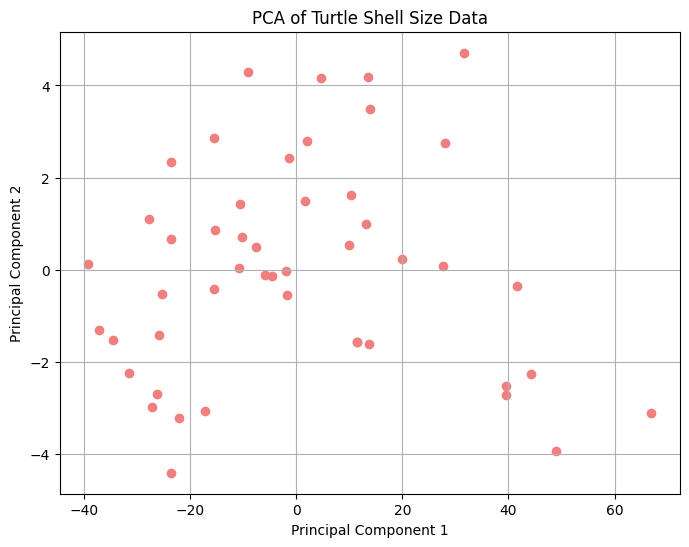

In [67]:
use_data = data[:,:3]

# Apply PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(use_data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='lightcoral')
plt.title('PCA of Turtle Shell Size Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


The PCA plot doesn't directly capture information about gender or the specific measurements of length, width, and height. It's a geometric transformation of the original data into a new coordinate system where the axes are the principal components (PCs), which are linear combinations of the original variables.

However, based on the provided statistics, it's evident that there's a noticeable difference between the two genders in terms of length, width, and height. Females tend to have higher values for all three measurements compared to males. Therefore, if we assume that the turtle shell size data represents these measurements, we can infer that females generally have larger turtle shells compared to males.

So, while the PCA plot doesn't explicitly show gender or the individual measurements, it indirectly supports the observation of differences between the genders based on the provided statistics. The clear separation between genders in the PCA plot aligns with the conclusion drawn from the data analysis.

## Bài 5. Tập dữ liệu stock chứa thông tin về tỷ suất lợi nhuận hàng tuần của năm cổ phiếu JP Morgan, Citibank, Wells Fargo, Royal Dutch Shell và ExxonMobil niêm yết trên Sở giao dịch chứng khoán New York trong giai đoạn từ tháng 1 năm 2004 đến tháng 12 năm 2005. Hãy dùng PCA để giảm chiều dữ liệu và nhận xét.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# URL link containing the data
url = "http://users.stat.umn.edu/~sandy/courses/8053/Data/Wichern_data/T8-4.DAT"

# Read data from the URL and store it in a DataFrame
df = pd.read_table(url, sep="\s+", header=None)

# Convert DataFrame to numpy ndarray
data = df.values

# Display some initial rows of the data
print(data[:5])

[[ 0.0130338 -0.0078431 -0.0031889 -0.0447693  0.0052151]
 [ 0.0084862  0.0166886 -0.00621    0.011956   0.013489 ]
 [-0.0179153 -0.0086393  0.010036   0.        -0.0061428]
 [ 0.0215589 -0.0034858  0.0174353 -0.0285917 -0.0069534]
 [ 0.0108225  0.0037167 -0.0101345  0.02919    0.0409751]]


In [69]:
# Transpose the data
data_T = data.T

# Mean data
data_mean = np.mean(data_T, axis=1)

print(data_mean)

[0.00106278 0.00065542 0.00162608 0.00404913 0.00403864]


In [70]:
# Centered around its mean
data_hat = data_T - np.expand_dims(data_mean, axis=1)

print(data_hat[:,:5])

[[ 0.01197102  0.00742342 -0.01897808  0.02049612  0.00975972]
 [-0.00849852  0.01603318 -0.00929472 -0.00414122  0.00306128]
 [-0.00481498 -0.00783608  0.00840992  0.01580922 -0.01176058]
 [-0.04881843  0.00790687 -0.00404913 -0.03264083  0.02514087]
 [ 0.00117646  0.00945036 -0.01018144 -0.01099204  0.03693646]]


In [71]:
# Cov Matrix
covMatrix = np.cov(data_hat)

print(covMatrix)

[[4.33269455e-04 2.75667901e-04 1.59026523e-04 6.41192942e-05
  8.89661568e-05]
 [2.75667901e-04 4.38717204e-04 1.79973690e-04 1.81451205e-04
  1.23262275e-04]
 [1.59026523e-04 1.79973690e-04 2.23972193e-04 7.34134800e-05
  6.05461180e-05]
 [6.41192942e-05 1.81451205e-04 7.34134800e-05 7.22496410e-04
  5.08277201e-04]
 [8.89661568e-05 1.23262275e-04 6.05461180e-05 5.08277201e-04
  7.65674173e-04]]


In [72]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)

print(eigenvalues)
print(eigenvectors)

[0.00136768 0.00070116 0.0002538  0.0001426  0.00011889]
[[ 0.22282283  0.62522603 -0.32611218 -0.662759    0.11765952]
 [ 0.30728997  0.57039003  0.24959014  0.4140935  -0.58860803]
 [ 0.1548103   0.34450492  0.03763929  0.49704993  0.78030428]
 [ 0.63896798 -0.24794753  0.64249741 -0.30886888  0.14845546]
 [ 0.65090441 -0.32184779 -0.64586064  0.21637575 -0.09371777]]


In [73]:
# The cumulative explained variance ratio for each principal component in PCA.
np.cumsum(eigenvalues) / np.sum(eigenvalues)

array([0.52926066, 0.80059364, 0.89880948, 0.95399348, 1.        ])

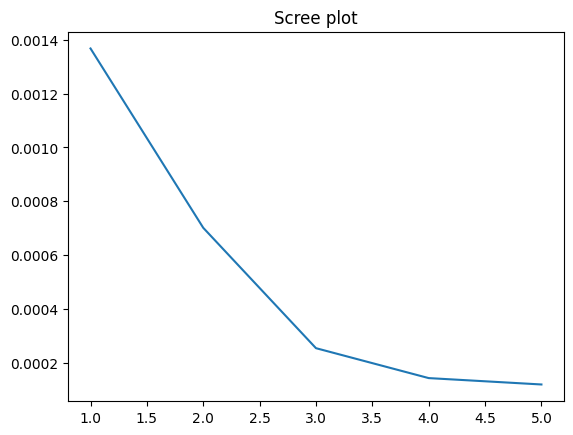

In [74]:
# Scree Plot
plt.plot(range(1,6),eigenvalues)
plt.title("Scree plot")
plt.show()

In [75]:
# Selects the first four principal components from the eigenvectors matrix obtained from PCA.
B = eigenvectors[:,:4]

data_pca = data_hat.T.dot(B)
print(data_pca[:5])

[[-0.03111715  0.0127041  -0.03833181  0.00148668]
 [ 0.01657136  0.00608485  0.00026244 -0.00257299]
 [-0.01499739 -0.0099891   0.0081599   0.01195679]
 [-0.02226933  0.02752993 -0.02099491  0.00026245]
 [ 0.04140105 -0.01432496 -0.01056422 -0.01081936]]


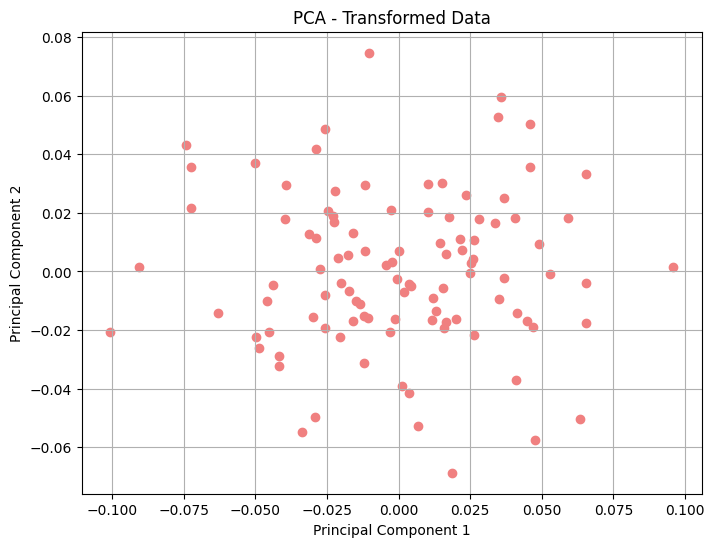

In [80]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='lightcoral')
plt.title('PCA - Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

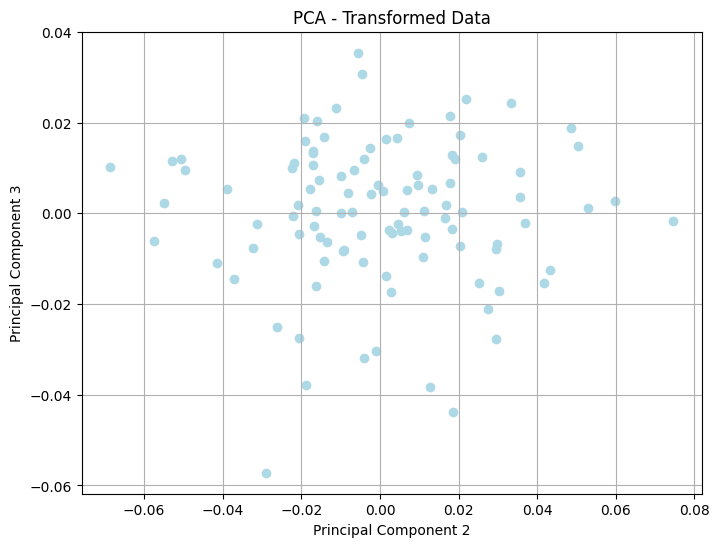

In [83]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 1], data_pca[:, 2], color='lightblue')
plt.title('PCA - Transformed Data')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.grid(True)
plt.show()

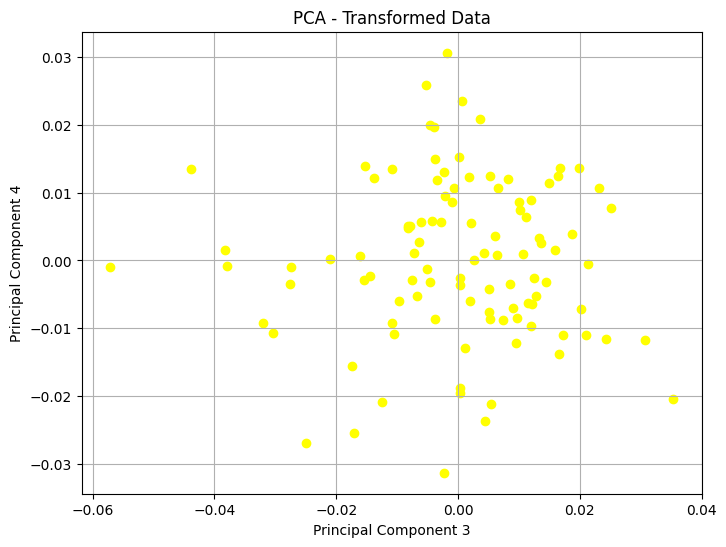

In [86]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 2], data_pca[:, 3], color='yellow')
plt.title('PCA - Transformed Data')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.grid(True)
plt.show()

After reducing the number of dimensions to 4 using Principal Component Analysis (PCA), we have effectively compressed the weekly returns dataset for JP Morgan, Citibank, Wells Fargo, Royal Dutch Shell, and ExxonMobil stocks from its original five dimensions to a more manageable four dimensions. This reduction in dimensionality allows us to capture the most significant patterns or trends in the data while minimizing redundancy.